In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/insurance/insurance.csv


In [2]:
data = pd.read_csv('/kaggle/input/insurance/insurance.csv')

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.shape

(1338, 7)

In [5]:
! pip freeze | grep seaborn

seaborn @ file:///home/conda/feedstock_root/build_artifacts/seaborn-split_1611834504644/work


In [6]:
! pip install -U seaborn

In [7]:
import seaborn as sns
sns.__version__

'0.11.1'

In [8]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [9]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [11]:
data.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

In [12]:
data.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [13]:
data.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='charges', ylabel='Density'>

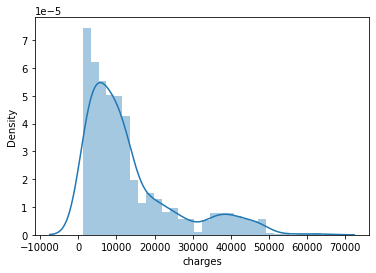

In [14]:
sns.distplot(data.charges)

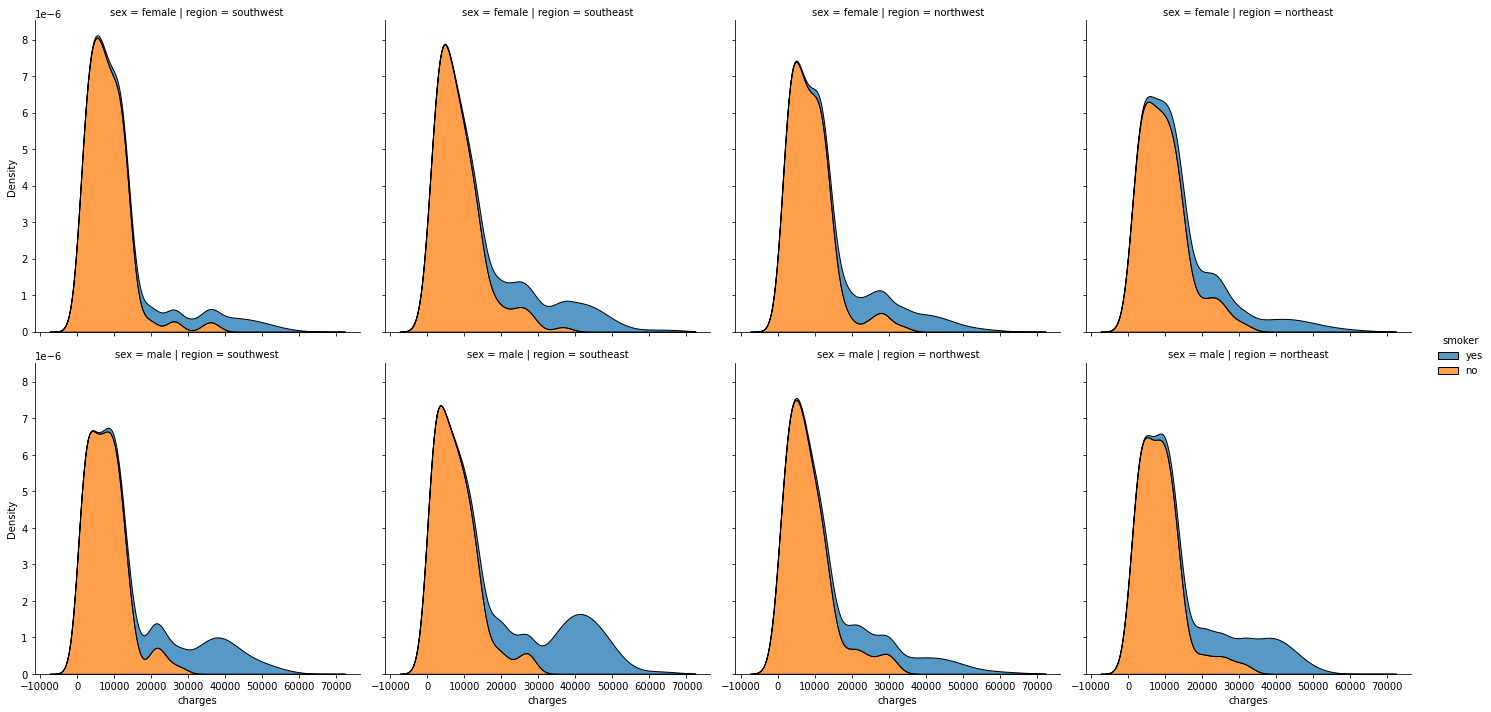

In [15]:
sns.displot(data = data,
            x='charges',
            row = 'sex',
            col = 'region',
            hue = 'smoker',
            fill = True,
            multiple = 'stack',
            kind ='kde')

sex
female    12569.578844
male      13956.751178
Name: charges, dtype: float64
sex
female            NaN
male      1387.172334
Name: charges, dtype: float64


Text(0.5, 1.0, 'distribution of target against sex')

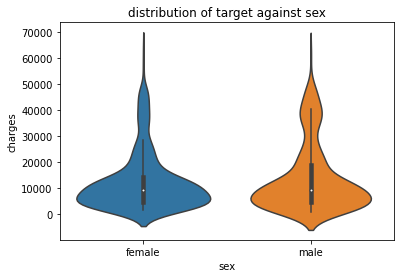

In [16]:
var = 'sex'
mean_data = data.groupby(var).charges.mean()
print(mean_data)
print(mean_data.diff())
sns.violinplot(data = data,x=var,y='charges')
plt.title('distribution of target against '+var)

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64
smoker
no              NaN
yes    23615.963534
Name: charges, dtype: float64


Text(0.5, 1.0, 'distribution of target against smoker')

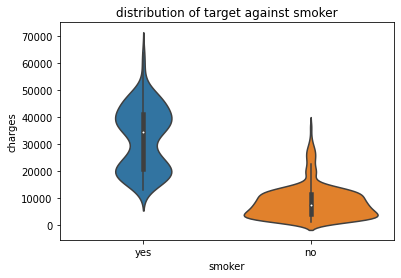

In [17]:
var = 'smoker'
mean_data = data.groupby(var).charges.mean()
print(mean_data)
print(mean_data.diff())
sns.violinplot(data = data,x=var,y='charges')
plt.title('distribution of target against '+var)

region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64


Text(0.5, 1.0, 'distribution of target against region')

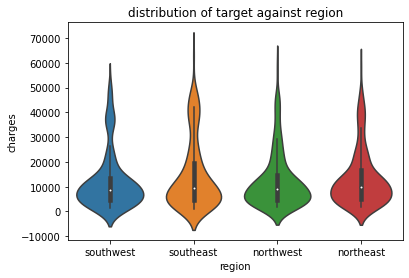

In [18]:
var = 'region'
mean_data = data.groupby(var).charges.mean()
print(mean_data)
#print(mean_data.diff())
sns.violinplot(data = data,x=var,y='charges')
plt.title('distribution of target against '+var)

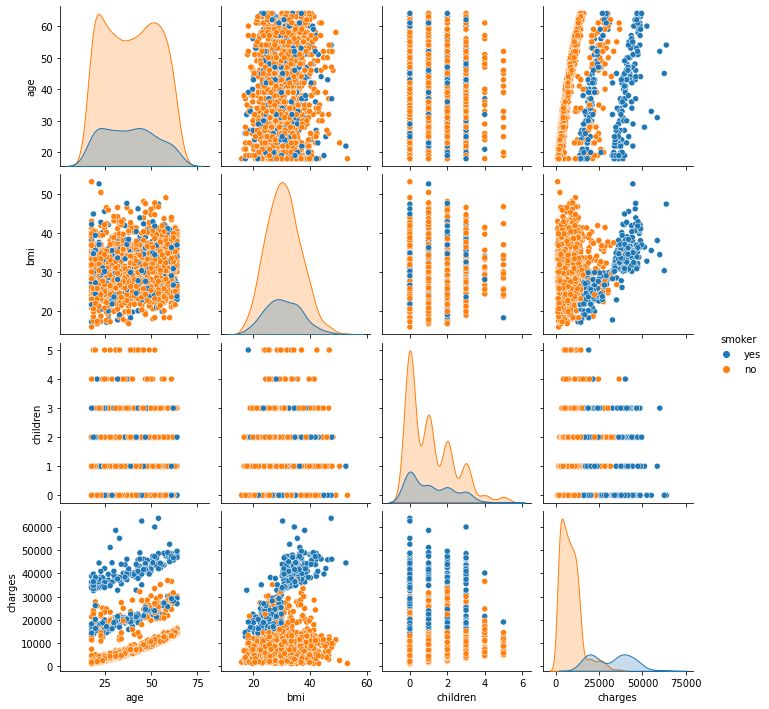

In [19]:
sns.pairplot(data,hue='smoker')

In [20]:
data = pd.get_dummies(data,prefix =['sex','smoker','region'],drop_first=True)
data.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [21]:
X = data.drop(columns = 'charges')
y = data.loc[:,'charges']
X_train,X_test,y_train,y_test = train_test_split(X , y , test_size =0.3, random_state=8)

In [22]:
import statsmodels.api as sm
from scipy import stats
X_train_const = sm.add_constant(X_train)
linearModel = sm.OLS(y_train,X_train_const)
linear = linearModel.fit()
print(linear.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     341.3
Date:                Sun, 18 Jul 2021   Prob (F-statistic):          3.78e-270
Time:                        12:47:36   Log-Likelihood:                -9494.5
No. Observations:                 936   AIC:                         1.901e+04
Df Residuals:                     927   BIC:                         1.905e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.073e+04   1220.052  

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn.linear_model import LinearRegression,Ridge,Lasso
import sklearn.metrics as metrics


In [24]:
pipeline =Pipeline([
    ('scaling','passthrough'),
    ('model','passthrough')
])
param_grid = {
    'scaling' : [StandardScaler(), MinMaxScaler()],
    'model' : [LinearRegression(), Ridge(), Lasso()]
}
grid = GridSearchCV(pipeline, param_grid = param_grid, cv=5, n_jobs=-1, scoring='r2')

In [25]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaling', 'passthrough'),
                                       ('model', 'passthrough')]),
             n_jobs=-1,
             param_grid={'model': [LinearRegression(), Ridge(), Lasso()],
                         'scaling': [StandardScaler(), MinMaxScaler()]},
             scoring='r2')

In [26]:
grid.score(X_test,y_test)

0.7573812207319579

In [27]:
! pip install comet-ml

     |████████████████████████████████| 276 kB 2.8 MB/s 
     |████████████████████████████████| 529 kB 14.3 MB/s 
     |████████████████████████████████| 54 kB 1.8 MB/s 
  Created wheel for configobj: filename=configobj-5.0.6-py3-none-any.whl size=34547 sha256=59752f3617c3545a3c5e1fd1fdd45245cfb4e767c3388b90840ef80bde56dcf8
  Stored in directory: /root/.cache/pip/wheels/0d/c4/19/13d74440f2a571841db6b6e0a273694327498884dafb9cf978
Successfully built configobj
